# Machine Learning Tutorial: From Data Cleaning to Classification

This tutorial walks through the full machine learning process using the breast cancer dataset, from data cleaning and exploration to model training and evaluation. It’s designed to help you understand key steps in building a classification model.

## Step 1: Import Libraries

* **pandas** (`pd`): Used to load, manipulate, and analyze data in table-like structures called DataFrames.

* **numpy** (`np`): Provides support for numerical operations on arrays and matrices.

* **matplotlib.pyplot** (`plt`): A plotting library used to create visualizations like graphs and charts.

* **seaborn** (`sns`): Built on top of matplotlib, it offers a higher-level interface for attractive statistical graphics.

* **train\_test\_split**: Helps split the dataset into training and testing sets for evaluating model performance.

* **StandardScaler**: Scales features to have zero mean and unit variance, improving many machine learning algorithms.

* **SimpleImputer**: Handles missing data by filling in values (e.g., with the mean or median).

* **RandomForestClassifier**: An ensemble machine learning model that builds multiple decision trees to improve prediction accuracy.

* **classification\_report** and **confusion\_matrix**: Tools for evaluating classification model performance with metrics and detailed error analysis.


In [ ]:
# Import Libraries
%pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Step 2: Load and Explore the Data

In this step, `load_breast_cancer()` loads the breast cancer dataset from scikit-learn, which we convert to a pandas DataFrame using `pd.DataFrame(data.data, columns=data.feature_names)`. We then add the target labels with `df['target'] = data.target`. To preview the dataset, `print(df.head())` shows the first few rows, and `print(df.info())` displays the DataFrame’s summary including data types and missing values. These commands help us understand the structure and contents of the dataset before moving forward.


In [3]:
# Load and Explore the Data
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Preview
print(df.head())
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

## Step 3: Data Cleaning

To check for missing values in the dataset, we use `print(df.isnull().sum())`, which counts how many null values are in each column. If any missing data were found, we could use the `SimpleImputer` to fill those gaps—this is shown in the commented-out lines where `imputer = SimpleImputer(strategy="mean")` creates an imputer that replaces missing values with the column mean, and `df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])` applies it to all feature columns except the target. Since the dataset has no missing values, this step confirms the data is clean and ready for the next processing stages.


In [4]:
# Data Cleaning
print(df.isnull().sum())
# Use imputer if missing values were present
# imputer = SimpleImputer(strategy="mean")
# df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


## Step 4: Exploratory Data Analysis (EDA)

In this step, we visualize important aspects of the data to better understand its characteristics. The line `sns.countplot(x='target', data=df)` creates a bar plot showing the distribution of the target classes (malignant vs. benign tumors), with `plt.title('Target Class Distribution')` adding a descriptive title before displaying the plot using `plt.show()`. Next, to explore relationships between features, we generate a correlation heatmap with `sns.heatmap(df.corr(), cmap='coolwarm', square=True)`, which visually highlights how strongly different features are related to each other. This plot is sized with `plt.figure(figsize=(12, 10))` and titled using `plt.title('Feature Correlation')` before being shown with `plt.show()`. These visualizations provide insights that can guide feature selection and model building.


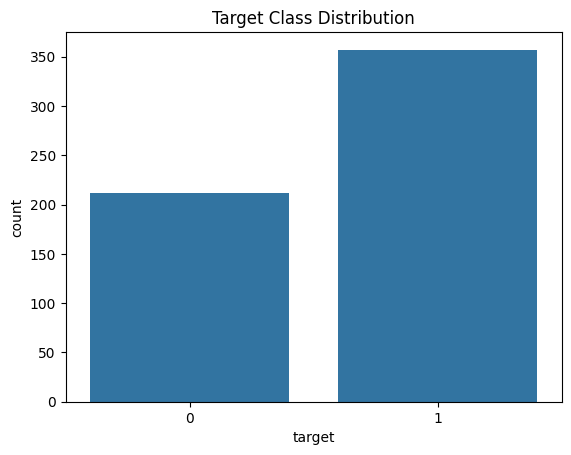

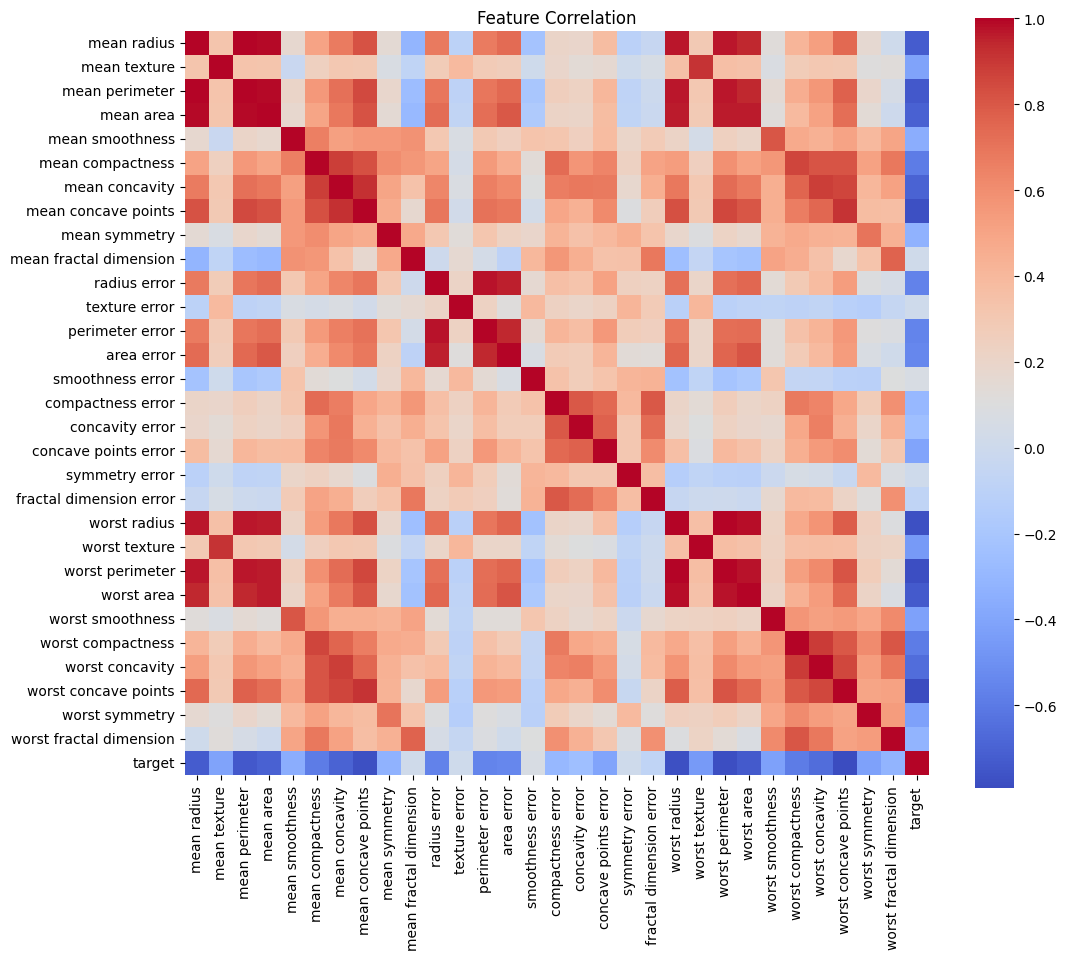

In [5]:
# Exploratory Data Analysis (EDA)
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', square=True)
plt.title('Feature Correlation')
plt.show()

## Step 5: Train-Test Split

In this step, we prepare the data for training and evaluation. The line `X = df.drop('target', axis=1)` creates the feature matrix by removing the target column, while `y = df['target']` selects the target labels separately. We then split the data into training and testing sets using `train_test_split(X, y, test_size=0.2, random_state=42)`, which reserves 20% of the data for testing and uses a fixed random seed to ensure reproducibility. This division allows us to train the model on one portion of the data and evaluate its performance on unseen examples.


In [6]:
# Train-Test Split
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Feature Scaling

Feature scaling is applied to ensure all input features have a similar scale, which helps many machine learning algorithms perform better. First, we create a scaler object with `scaler = StandardScaler()`. Then, we fit the scaler to the training data and transform it using `X_train_scaled = scaler.fit_transform(X_train)`, which standardizes the features to have zero mean and unit variance. Finally, we apply the same scaling parameters to the test set with `X_test_scaled = scaler.transform(X_test)` to maintain consistency between training and testing data.


In [7]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7: Train a Classifier

In this step, we create a machine learning model to classify the breast cancer data. We initialize a Random Forest classifier with `model = RandomForestClassifier(random_state=42)`, which builds multiple decision trees to improve prediction accuracy and reduce overfitting. Then, we train the model using the scaled training data with `model.fit(X_train_scaled, y_train)`, allowing it to learn patterns that distinguish between malignant and benign tumors.


In [8]:
# Train a Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 8: Evaluate the Model

After training, we test the model’s performance by making predictions on the scaled test data with `y_pred = model.predict(X_test_scaled)`. To visualize the results, we compute a confusion matrix using `confusion_matrix(y_test, y_pred)` and display it as a heatmap with `sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")`, labeling the axes as “Predicted” and “Actual” to interpret the classification errors clearly. Finally, we print a detailed performance summary using `print(classification_report(y_test, y_pred))`, which shows metrics like precision, recall, and F1-score, helping us understand how well the model distinguishes between classes.


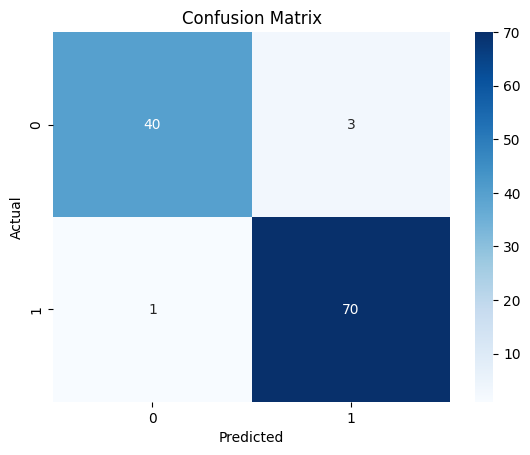

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
# Evaluate the Model
y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

## Summary
| Step | Description |
|------|-------------|
| 1 | Import libraries |
| 2 | Load dataset |
| 3 | Handle missing data |
| 4 | Exploratory data analysis |
| 5 | Split into train/test |
| 6 | Normalize features |
| 7 | Train classifier |
| 8 | Evaluate model |